# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. You will be using the Salary Data for the tasks in this module. <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [153]:
lin_df = pd.read_csv("D:\Work\SF\ML-SF-master\ML-SF-master\Data\SalaryData.csv",index_col=[0])
lin_df = lin_df.iloc[:,0].str.split(' ', expand = True)
lin_X = lin_df.iloc[:,0].values
lin_y = lin_df.iloc[:,1].values
lin_df.columns = ['Years','Salary']
m = len(lin_X)

In [154]:
log_df = pd.read_csv("D:\Work\SF\ML-SF-master\ML-SF-master\Data\SalaryData.csv",index_col=[0])
log_df = log_df.iloc[:,0].str.split(' ', expand = True)
newCol = np.array([0]* log_df.shape[0])
log_df.columns = ['Years','Salary']
i = 0
for sal in log_df['Salary']:
    newCol[i] = int(sal) < 60000
    i+=1
log_df['Salary<60000'] = newCol
log_X = log_df.iloc[:,0].values
log_y = log_df.iloc[:,2].values

In [155]:
from sklearn.model_selection import train_test_split
lin_X_train, lin_X_test, lin_y_train, lin_y_test = train_test_split(lin_X, lin_y, test_size = 0.25, random_state = 0)

lin_X_train = lin_X_train.reshape(-1,1)
lin_y_train = lin_y_train.reshape(-1,1)
lin_X_test = lin_X_test.reshape(-1,1)
lin_y_test = lin_y_test.reshape(-1,1)

from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
lin_X_train = scaler1.fit_transform(lin_X_train)
lin_X_test = scaler1.fit_transform(lin_X_test)

scaler2 = StandardScaler()
lin_y_train = scaler2.fit_transform(lin_y_train)
lin_y_test = scaler2.fit_transform(lin_y_test)

In [156]:
from sklearn.model_selection import train_test_split
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(log_X, log_y, test_size = 0.25, random_state = 0)

log_X_train = log_X_train.reshape(-1,1)
log_y_train = log_y_train.reshape(-1,1)
log_X_test = log_X_test.reshape(-1,1)
log_y_test = log_y_test.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
log_X_train = scaler.fit_transform(log_X_train)
log_X_test = scaler.fit_transform(log_X_test)
log_y_train = scaler.fit_transform(log_y_train)
log_y_test = scaler.fit_transform(log_y_test)

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

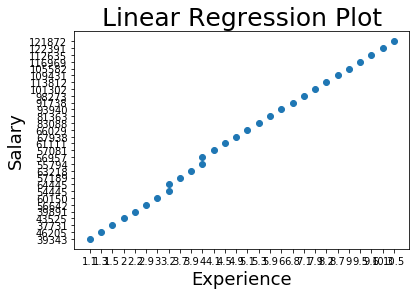

In [157]:
fig,ax1 = plt.subplots()

ax1.scatter(x = lin_X,y=lin_y)
ax1.set_title('Linear Regression Plot',fontsize=25)
ax1.set_xlabel('Experience',fontsize=18)
ax1.set_ylabel('Salary',fontsize=18)
plt.show()

In [158]:
def hypothesis(w1,w0,X):
    return((w1*X) + w0) 

In [159]:
def costfunction(X,y,w0,w1,N):
    cost = 0
    for i in range(N-1):
        cost += (hypothesis(w1,w0,X[i])-y[i])**2
    return cost/N

In [160]:
def grad_des(X,y,w1,w0,N):
    w1_new = 0
    w0_new = 0
    alpha = 0.05
    for i in range(N):
        w1_new += ((hypothesis(w1,w0,X[i])-y[i])*X[i])*2
        w0_new += (hypothesis(w1,w0,X[i])-y[i])*2
    w1 -= (alpha*(1/N)*w1_new)
    w0 -= (alpha*(1/N)*w0_new)
    return w1,w0

In [161]:
def train(X,y,w1,w0,epochs):
    for i in range(epochs):
        w1,w0 = grad_des(X,y,w1,w0,len(X))
        if (i%10==0):
            c = costfunction(X,y,w1,w0,len(X))
            print('Cost in epoch no: ',i)
            print(c)
    return w1,w0

In [162]:
def predict(w1,w0,X):
    y = [0.0 for i in range(len(X))]
    for i in range(len(X)):
        y[i] = float(w1*X[i] + w0)
    return y

In [163]:
w1,w0 = train(lin_X_train,lin_y_train,0,0,100)
print("The optimum value of w1 and w0: ", w1,w0)

Cost in epoch no:  0
[0.98333836]
Cost in epoch no:  10
[1.36254779]
Cost in epoch no:  20
[1.63968782]
Cost in epoch no:  30
[1.7539392]
Cost in epoch no:  40
[1.79591821]
Cost in epoch no:  50
[1.8108158]
Cost in epoch no:  60
[1.81604193]
Cost in epoch no:  70
[1.81786802]
Cost in epoch no:  80
[1.81850521]
Cost in epoch no:  90
[1.81872744]
The optimum value of w1 and w0:  [0.96927367] [1.10517656e-16]


In [164]:
lin_y_pred = predict(w1,w0,lin_X_test)

In [165]:
def my_formula(x):
    return w0 + w1*x

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  

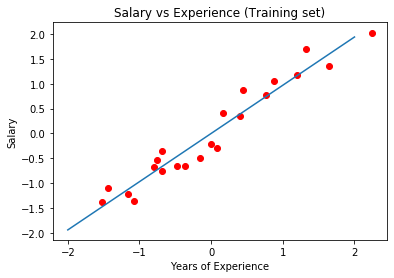

In [172]:
plt.scatter(lin_X_train,lin_y_train, c = "red", marker = 'o')
graph(my_formula, range(-2,3))
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

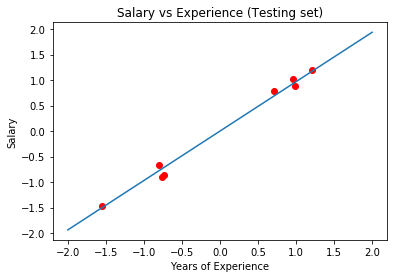

In [174]:
plt.scatter(lin_X_test,lin_y_test, c = "red", marker = 'o')
graph(my_formula, range(-2,3))
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [175]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(lin_y_test, lin_y_pred))
print('MSE:', metrics.mean_squared_error(lin_y_test, lin_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(lin_y_test, lin_y_pred)))

MAE: 0.09228442920047945
MSE: 0.010426387642724019
RMSE: 0.10210968437285475


## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

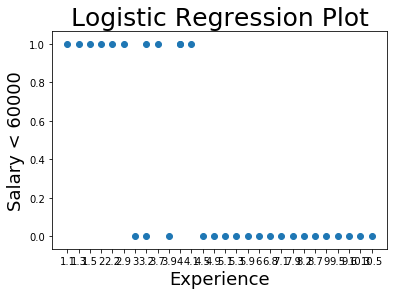

In [176]:
fig,ax2 = plt.subplots()
ax2.scatter(x=log_X,y=log_y)
ax2.set_title('Logistic Regression Plot',fontsize=25)
ax2.set_xlabel('Experience',fontsize=18)
ax2.set_ylabel('Salary < 60000',fontsize=18)
plt.show()

In [177]:
def hypothesis(w1,w0,X):
    return (1/(1+np.exp(-((w1*X)+w0)))) 

In [178]:
def costfunction(X,y,w0,w1,N):
    cost = 0
    for i in range(N-1):
        h = hypothesis(w1,w0,X[i])
        cost += ((-y[i] * np.log(h)) + ((1 - y[i]) * np.log(1 - h)))
    return cost/N

In [179]:
def grad_des(X,y,w1,w0,N):
    w1_new = 0
    w0_new = 0
    alpha = 0.05
    for i in range(N):
        w1_new += ((hypothesis(w1,w0,X[i])-y[i])*X[i])*2
        w0_new += (hypothesis(w1,w0,X[i])-y[i])*2
    w1 -= (alpha*(1/N)*w1_new)
    w0 -= (alpha*(1/N)*w0_new)
    return w1,w0

In [180]:
def train(X,y,w1,w0,epochs):
    for i in range(epochs):
        w1,w0 = grad_des(X,y,w1,w0,len(X))
        if (i%10==0):
            c = costfunction(X,y,w1,w0,len(X))
            print('Cost in epoch no: ',i)
            print(c)
    return w1,w0

In [181]:
def predict(w1,w0,X):
    y = [0.0 for i in range(len(X))]
    for i in range(len(X)):
        y[i]=(1/(1+np.exp(-(w1*X[i]+w0))))
    return y

In [182]:
w1,w0 = train(log_X_train,log_y_train,0,0,300)
print("The optimum value of w1 and w0: ", w1,w0)

Cost in epoch no:  0
[-0.21094499]
Cost in epoch no:  10
[-0.12752816]
Cost in epoch no:  20
[-0.06171198]
Cost in epoch no:  30
[-0.00795374]
Cost in epoch no:  40
[0.03738759]
Cost in epoch no:  50
[0.07672966]
Cost in epoch no:  60
[0.11170711]
Cost in epoch no:  70
[0.14344697]
Cost in epoch no:  80
[0.17274048]
Cost in epoch no:  90
[0.20015223]
Cost in epoch no:  100
[0.22609064]
Cost in epoch no:  110
[0.2508547]
Cost in epoch no:  120
[0.27466559]
Cost in epoch no:  130
[0.29768839]
Cost in epoch no:  140
[0.32004737]
Cost in epoch no:  150
[0.34183684]
Cost in epoch no:  160
[0.36312897]
Cost in epoch no:  170
[0.38397943]
Cost in epoch no:  180
[0.40443159]
Cost in epoch no:  190
[0.4245196]
Cost in epoch no:  200
[0.44427061]
Cost in epoch no:  210
[0.46370652]
Cost in epoch no:  220
[0.48284523]
Cost in epoch no:  230
[0.50170159]
Cost in epoch no:  240
[0.52028811]
Cost in epoch no:  250
[0.5386155]
Cost in epoch no:  260
[0.55669312]
Cost in epoch no:  270
[0.57452919]
Co

In [186]:
log_y_pred = predict(w1,w0,log_X_test)

In [187]:
for i in range(len(log_y_pred)):
    if(log_y_pred[i]>=0.5):
        log_y_pred[i] = 1
    else:
        log_y_pred[i] = 0
for i in range(len(log_y_test)):
    if(log_y_test[i]>=0.5):
        log_y_test[i] = 1
    else:
        log_y_test[i] = 0

In [188]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(log_y_test,log_y_pred))
print("\n\n")
print(classification_report(log_y_test,log_y_pred))

[[5 0]
 [2 1]]



              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83         5
         1.0       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.